### ***This code was used to create Fig 7***

#### ***CMIP6 Data***

In [1]:
import pandas as pd 

df = pd.read_csv(r"path_to_decomposed_by_grid_of_CMIP6.csv")
df = df[["gcm",	"scenario", "method", "gcm:scenario", "gcm:method", "scenario:method", "lat_lon"]]
df.rename(columns = {"gcm": "GCMs", 
                     "scenario": "Scenarios",
                     "method": "Scaling Methods",
                     "gcm:scenario": "GCMs x Scenarios",
                     "gcm:method": "GCMs x Scaling Methods",
                     "scenario:method": "Scenarios x Scaling Methods"}, inplace =  True)
df[['lat', 'lon']] = df['lat_lon'].str.split(',', expand=True)
df['lat'] = pd.to_numeric(df['lat'])
df['lon'] = pd.to_numeric(df['lon'])
df.drop(columns=['lat_lon'], inplace=True)
d6 = pd.melt(df, id_vars=['lat', 'lon'], var_name='source')
d6["value"] = d6["value"].clip(lower = 0)

c:\Users\USER2\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


#### ***CMIP5 Data***

In [2]:
import pandas as pd 

df = pd.read_csv(r"path_to_decomposed_by_grid_of_CMIP5.csv")
df = df[["gcm",	"scenario", "method", "gcm:scenario", "gcm:method", "scenario:method", "lat_lon"]]
df.rename(columns = {"gcm": "GCMs", 
                     "scenario": "Scenarios",
                     "method": "Scaling Methods",
                     "gcm:scenario": "GCMs x Scenarios",
                     "gcm:method": "GCMs x Scaling Methods",
                     "scenario:method": "Scenarios x Scaling Methods"}, inplace =  True)
df[['lat', 'lon']] = df['lat_lon'].str.split(',', expand=True)
df['lat'] = pd.to_numeric(df['lat'])
df['lon'] = pd.to_numeric(df['lon'])
df.drop(columns=['lat_lon'], inplace=True)
d5 = pd.melt(df, id_vars=['lat', 'lon'], var_name='source')
d5["value"] = d5["value"].clip(lower=0)

#### ***Merging and Difference***

In [3]:
merged_df = pd.merge(d6, d5, on=['lat', 'lon', 'source'], suffixes=('_d6', '_d5'))
merged_df['value'] = merged_df['value_d6'] - merged_df['value_d5']
diff = merged_df[['lat', 'lon', 'source', 'value']]

C:\Users\USER2\AppData\Local\Temp\ipykernel_31972\2956531970.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


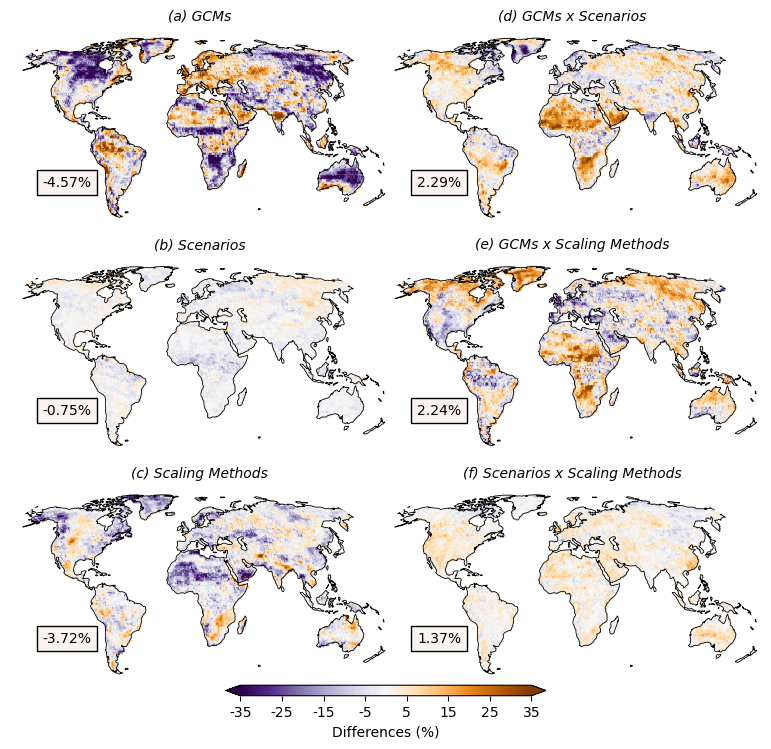

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

fig, axes = plt.subplots(3, 2, figsize=(8, 7), subplot_kw={'projection': ccrs.Robinson()})

sources = diff['source'].unique()

norm = plt.Normalize(-35, 35)

labels = ['a', 'b', 'c', 'd', 'e', 'f']

subplot_indices = [(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (2, 1)]

for i, (label, (row, col)) in enumerate(zip(labels, subplot_indices)):
    ax = axes[row, col]
    source = sources[i]
    subset = diff[diff['source'] == source]
    lons = subset['lon'].values
    lats = subset['lat'].values
    precipitation = subset["value"].values * 100
    
    ax.set_title(f"({label}) {source}", fontsize=10, y=1.03, style="italic")

    num_colors = 1000
    cmap = sns.color_palette("PuOr_r", as_cmap=True)

    xy = ax.projection.transform_points(ccrs.PlateCarree(), lons, lats)
    sc = ax.scatter(xy[:, 0], xy[:, 1], c=precipitation, cmap=cmap, norm=norm, s=.5, marker="s")
    ax.coastlines(linewidth=0.6)
    ax.set_frame_on(False)
    source_avg = subset["value"].mean() * 100

    ax.text(0.15, 0.2, f'{source_avg:.2f}%', transform=ax.transAxes,
            fontsize=10, ha='center', bbox=dict(facecolor='#FAF3F0', edgecolor='black', boxstyle='square,pad=0.4'))

cbar_ax = fig.add_axes([0.3, 0, 0.4, 0.015])  
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal', label='Differences (%)', extend="both")

ticks = range(-35, 40, 10)
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(tick) for tick in ticks])

plt.subplots_adjust(left=0.05, right=0.95, bottom=0.3, top=0.95, wspace=0.1, hspace=0.01)  # Adjust hspace as per your preference

plt.tight_layout()

plt.savefig("save_path", dpi=600, bbox_inches='tight')

# Show the plot
plt.show()
